## Import libs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.data import Dataset
import seaborn as sns


from models.unfair_lr.models import UnfairLogisticRegression
from models.unfair_lr.learning import train_loop
from util.evaluation import *
from util.load_data import load_data

## Preliminaries

In [2]:
batch_size = 64
epochs = 100
learning_rate = 0.001

In [3]:
cv_seeds = [13, 29, 42, 55, 73]

## Load data

In [4]:
data_name = 'adult'

In [5]:
x, y, a = load_data(data_name)
raw_data = (x, y, a)

In [6]:
xdim = x.shape[1]
ydim = y.shape[1]
adim = a.shape[1]
zdim = 8

## Result file

In [7]:
header = "model_name", "cv_seed", "clas_acc", "dp", "deqodds", "deqopp", "trade_dp", "trade_deqodds", "trade_deqopp", "TN_a0", "FP_a0", "FN_a0", "TP_a0", "TN_a1", "FP_a1", "FN_a1", "TP_a1"
results = []

## Testing

In [8]:
for cv_seed in cv_seeds:
    x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
        x, y, a, test_size=0.3, random_state=cv_seed)

    train_data = Dataset.from_tensor_slices((x_train, y_train, a_train))
    train_data = train_data.batch(batch_size, drop_remainder=True)

    test_data = Dataset.from_tensor_slices((x_test, y_test, a_test))
    test_data = test_data.batch(batch_size, drop_remainder=True)

    # train below

    model = UnfairLogisticRegression(xdim, ydim, batch_size)
    ret = train_loop(model, train_data, epochs)
    Y, A, Y_hat = evaluation(model, test_data)
    
    clas_acc, dp, deqodds, deqopp, confusion_matrix, metrics_a0, metrics_a1  = compute_metrics(Y, A, Y_hat, adim=adim)
    
    fair_metrics = (dp, deqodds, deqopp)
    
    tradeoff = []
    
    for fair_metric in fair_metrics:
        tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
    
    result = ['UnfairLR-decay', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]] + metrics_a0 + metrics_a1

    results.append(result)

> Epoch | Class Loss | Class Acc
> 1 | 0.44726601243019104 | 0.6350581983805668
> 2 | 0.3877369463443756 | 0.7975392206477733
> 3 | 0.368744820356369 | 0.8197747975708503
> 4 | 0.35935795307159424 | 0.8251201923076923
> 5 | 0.3537173569202423 | 0.827397520242915
> 6 | 0.34990936517715454 | 0.8287892206477733
> 7 | 0.3471410274505615 | 0.8294218117408907
> 8 | 0.34502410888671875 | 0.8300544028340081
> 9 | 0.3433387875556946 | 0.830813512145749
> 10 | 0.341957151889801 | 0.8306237348178138
> 11 | 0.34079819917678833 | 0.8307818825910931
> 12 | 0.33980798721313477 | 0.831066548582996
> 13 | 0.3389490842819214 | 0.8312879554655871
> 14 | 0.33819472789764404 | 0.8316358805668016
> 15 | 0.3375251889228821 | 0.8319521761133604
> 16 | 0.3369255065917969 | 0.8321103238866396
> 17 | 0.33638420701026917 | 0.8322368421052632
> 18 | 0.33589231967926025 | 0.8325531376518218
> 19 | 0.33544260263442993 | 0.8329643218623481
> 20 | 0.3350293040275574 | 0.8331540991902834
> 21 | 0.33464765548706055 | 0.

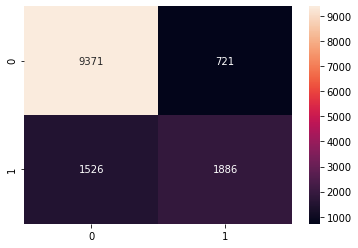

In [9]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [10]:
for cv_seed in cv_seeds:
    x_train, x_test, y_train, y_test, a_train, a_test = train_test_split(
        x, y, a, test_size=0.3, random_state=cv_seed)

    train_data = Dataset.from_tensor_slices((x_train, y_train, a_train))
    train_data = train_data.batch(batch_size, drop_remainder=True)

    test_data = Dataset.from_tensor_slices((x_test, y_test, a_test))
    test_data = test_data.batch(batch_size, drop_remainder=True)

    # train below

    opt = Adam(learning_rate=learning_rate)

    model = UnfairLogisticRegression(xdim, ydim, batch_size)
    ret = train_loop(model, train_data, epochs, opt)
    Y, A, Y_hat = evaluation(model, test_data)
    
    clas_acc, dp, deqodds, deqopp, confusion_matrix, metrics_a0, metrics_a1  = compute_metrics(Y, A, Y_hat, adim=adim)
    
    fair_metrics = (dp, deqodds, deqopp)
    
    tradeoff = []
    
    for fair_metric in fair_metrics:
        tradeoff.append(compute_tradeoff(clas_acc, fair_metric))
    
    result = ['UnfairLR', cv_seed, clas_acc, dp, deqodds, deqopp, tradeoff[0], tradeoff[1], tradeoff[2]] + metrics_a0 + metrics_a1

    results.append(result)

    del(opt)

> Epoch | Class Loss | Class Acc
> 1 | 0.44726601243019104 | 0.6350581983805668
> 2 | 0.38056838512420654 | 0.8073127530364372
> 3 | 0.35443824529647827 | 0.8240131578947368
> 4 | 0.34044915437698364 | 0.8300227732793523
> 5 | 0.33180204033851624 | 0.8318256578947368
> 6 | 0.32612842321395874 | 0.835210020242915
> 7 | 0.32231807708740234 | 0.837171052631579
> 8 | 0.3197230100631714 | 0.8386892712550608
> 9 | 0.3179227113723755 | 0.8395748987854251
> 10 | 0.31663697957992554 | 0.840808451417004
> 11 | 0.3156821131706238 | 0.8412196356275303
> 12 | 0.3149406909942627 | 0.8419154858299596
> 13 | 0.3143402338027954 | 0.8422317813765182
> 14 | 0.3138370215892792 | 0.8426429655870445
> 15 | 0.31340479850769043 | 0.8435285931174089
> 16 | 0.31302762031555176 | 0.8436234817813765
> 17 | 0.3126956522464752 | 0.8442877024291497
> 18 | 0.3124023973941803 | 0.8446672570850202
> 19 | 0.3121435046195984 | 0.8448886639676113
> 20 | 0.31191587448120117 | 0.8450784412955465
> 21 | 0.3117170035839081 | 

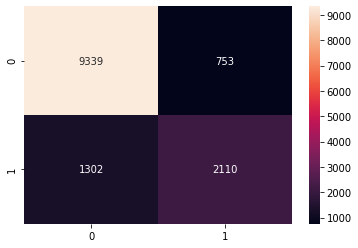

In [11]:
sns.heatmap(confusion_matrix, annot=True, fmt='g')

## Saving into DF then CSV

In [12]:
result_df = pd.DataFrame(results, columns=header)
result_df

,model_name,cv_seed,clas_acc,dp,deqodds,deqopp,trade_dp,trade_deqodds,trade_deqopp,TN_a0,FP_a0,FN_a0,TP_a0,TN_a1,FP_a1,FN_a1,TP_a1
0,UnfairLR-decay,13,0.837233,0.806283,0.856564,0.799981,0.821467,0.846788,0.818183,3807.0,62.0,314.0,197.0,5642.0,647.0,1175.0,1660.0
1,UnfairLR-decay,29,0.836567,0.798439,0.846336,0.782983,0.817058,0.841423,0.808888,3802.0,76.0,311.0,195.0,5588.0,690.0,1130.0,1712.0
2,UnfairLR-decay,42,0.835530,0.811083,0.865257,0.811986,0.823125,0.850134,0.823590,3856.0,69.0,308.0,191.0,5603.0,616.0,1228.0,1633.0
3,UnfairLR-decay,55,0.834345,0.810234,0.861803,0.804664,0.822113,0.847852,0.819236,3778.0,71.0,310.0,189.0,5638.0,623.0,1233.0,1662.0
4,UnfairLR-decay,73,0.833605,0.804183,0.868893,0.824305,0.818630,0.850883,0.828929,3799.0,70.0,286.0,192.0,5572.0,651.0,1240.0,1694.0
5,UnfairLR,13,0.849156,0.814985,0.902947,0.885014,0.831719,0.875226,0.866714,3782.0,87.0,250.0,261.0,5650.0,639.0,1061.0,1774.0
6,UnfairLR,29,0.849230,0.803651,0.889696,0.865887,0.825812,0.868992,0.857477,3794.0,84.0,250.0,256.0,5599.0,679.0,1023.0,1819.0
7,UnfairLR,42,0.854414,0.812003,0.913281,0.902751,0.832668,0.882867,0.877917,3834.0,91.0,228.0,271.0,5601.0,618.0,1029.0,1832.0
8,UnfairLR,55,0.850489,0.815062,0.903148,0.878344,0.832399,0.876028,0.864192,3755.0,94.0,246.0,253.0,5657.0,604.0,1075.0,1820.0
9,UnfairLR,73,0.847823,0.803366,0.897272,0.874468,0.824996,0.871847,0.860940,3771.0,98.0,234.0,244.0,5568.0,655.0,1068.0,1866.0


In [13]:
result_df.to_csv(f'{data_name}-result/unfair_lr-{epochs}.csv')